#  Explore Data

The goal of this section is to get comfortable with our data. We check how each variable relates to the churn rate. For categorical features, we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, probability density plots can be used to look at the distribution of the variable. 

## Understanding the Churn Distribution
Let's known our target feature

In [1]:
# import important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string as st


# if we want to see all columns, we set this parametr on
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# use custom function
%run -i 'py/dataframecheck.py'
%run -i 'py/pr_plots.py'

# set style for plots
sns.set(style="whitegrid")


In [2]:
# read dataset
df = pd.read_csv("data/clean_churn.csv")
df.head(3)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [3]:
# check our dataset
sum_info(df)

Number of rows: 7032, number of columns: 20


,Name,dtypes,Missing,Uniques,First Row,Last Row
0,gender,object,0,2,Female,Male
1,seniorcitizen,int64,0,2,0,0
2,partner,object,0,2,Yes,No
3,dependents,object,0,2,No,No
4,tenure,int64,0,72,1,66
5,phoneservice,object,0,2,No,Yes
6,multiplelines,object,0,3,No phone service,No
7,internetservice,object,0,3,DSL,Fiber optic
8,onlinesecurity,object,0,3,No,Yes
9,onlinebackup,object,0,3,Yes,No


In [4]:
# define caterogical columns and numeric columns
cat_cols=['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice','multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']
numeric_cols=['tenure','monthlycharges', 'totalcharges']
print('Number of Categorical Features =', len(cat_cols))
print('Number of Numerical Features =', len(numeric_cols))

Number of Categorical Features = 16
Number of Numerical Features = 3


In [5]:
print(f"Churn (Target) Percentage Dustribution ", "\n",round(df['churn'].value_counts(normalize=True) * 100,2))

Churn (Target) Percentage Dustribution  
 No     73.42
Yes    26.58
Name: churn, dtype: float64


In our data, almost **74%** of the customers do not churn. Clearly the data is **skewed** as company would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives.

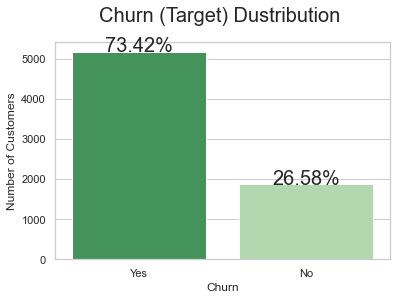

In [6]:
# one person per row
total = float(len(df))  
ax = sns.countplot(x='churn', data=df,  palette="Greens_r")
ax.set(xlabel='Churn',ylabel='Number of Customers')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3,
            '{:1.2f}'.format((height/total*100))+ '%',
            ha="center",fontsize=20) 
ax.set_xticklabels(("Yes","No"))    
plt.title(("Churn (Target) Dustribution "), fontsize = 20, pad = 20)
plt.show()

## Who is most likely to churn?
I will try compare the data distribution between two groups: the former customers ('churn==Yes') and the active customers ('churn == No'). To make the comparison easy to understand, I will group the comparison by the same data class (demographic, services usage and etc).

In [7]:
# Service Usage and churn/(Service Usage and churn + Service Usage and wasn't churn)
# Phone service only customers
service_churn_percent = []
service_churn_labels = []
values = df[(df["internetservice"] == "No") & (df["phoneservice"] == "Yes")]["churn"].value_counts()
service_churn_percent.append(values[1] / (values[0] + values[1]) * 100.0)
service_churn_labels.append("Phone Only") 

# Internet service only customers
values = df[(df["internetservice"] != "No") & (df["phoneservice"] == "No")]["churn"].value_counts()
service_churn_percent.append(values[1] / (values[0] + values[1]) * 100.0)
service_churn_labels.append("Internet Only")

# Phone and Internet customers
values = df[(df["internetservice"] != "No") & (df["phoneservice"] == "Yes")]["churn"].value_counts()
service_churn_percent.append(values[1] / (values[0] + values[1]) * 100.0)
service_churn_labels.append("Phone and Internet")

In [8]:
service_churn_percent

[7.434210526315789, 25.0, 32.8228476821192]

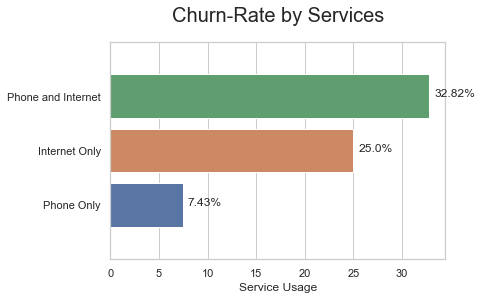

In [9]:
# Churn-Rate by Service Usage  
ax = sns.barplot(service_churn_percent, service_churn_labels)
ax.set(xlabel='Service Usage')
for i, p in enumerate(ax.patches):
    ax.annotate((str(round(service_churn_percent[i],2))+"%"),
                (p.get_x() + p.get_width(), p.get_y()+0.2),
                xytext=(5, 10), textcoords='offset points')
ax.set_ylim(-1,3)
plt.title(("Churn-Rate by Services"), fontsize = 20, pad =20)
plt.show()

The customer churn rate for the phone-and-Internet customers is the highest, which gives all the more reasons to reduce the customer churn for this segment.

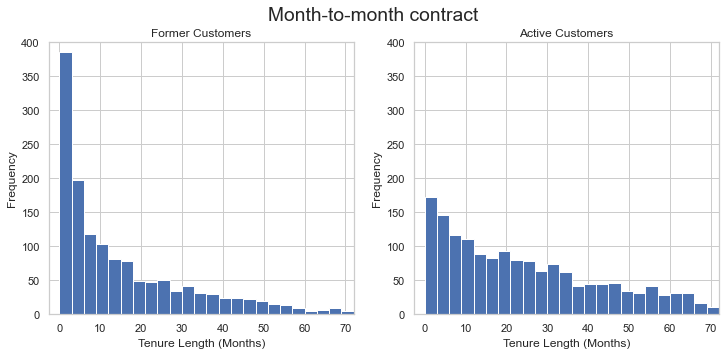

In [10]:
plot_contract(df,"Month-to-month",400)

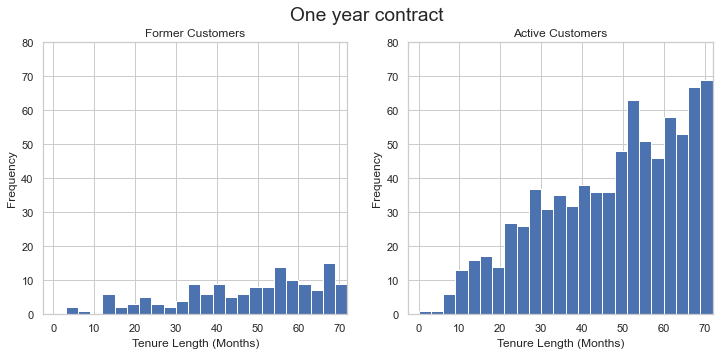

In [11]:
plot_contract(df,"One year", 80)

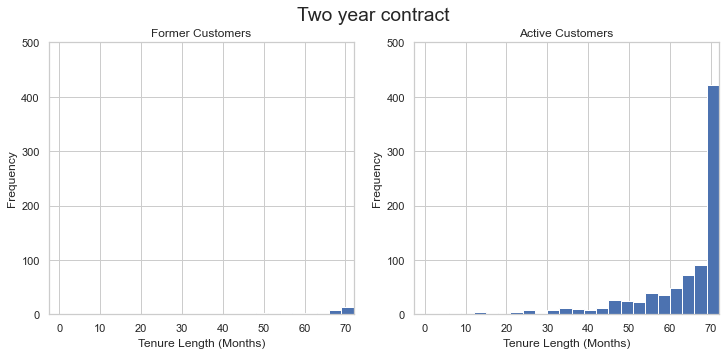

In [12]:
plot_contract(df,"Two year",500)

The histogram shows that majority of the churn takes place within a first year of the service. This behavior might be partially driven by the types of contract. 
_______

## Popularity of Internet Add-ons
Only considering customers who have internet

In [13]:
internet_cols=['onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies']

In [14]:
idf = df[(df["internetservice"] != "No")]
idf.shape

(5512, 20)

In [15]:
def percent_popularity(df, col):
    values = df[(df[col] == "Yes")][col].value_counts()
    return values[0]/df.shape[0]*100

In [16]:
internet_service_popularity = []
internet_service_labels = []

In [17]:
internet_service_popularity.append(percent_popularity(idf,'onlinesecurity'))
internet_service_popularity.append(percent_popularity(idf,'onlinebackup'))
internet_service_popularity.append(percent_popularity(idf,'deviceprotection'))
internet_service_popularity.append(percent_popularity(idf,'techsupport'))
internet_service_popularity.append(percent_popularity(idf,'streamingtv'))
internet_service_popularity.append(percent_popularity(idf,'streamingmovies'))
internet_service_popularity

[36.556603773584904,
 43.99492017416546,
 43.86792452830189,
 37.010159651669085,
 49.03846153846153,
 49.546444121915826]

In [18]:
for i in internet_cols:
    internet_service_labels.append(i)
internet_service_labels

['onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies']

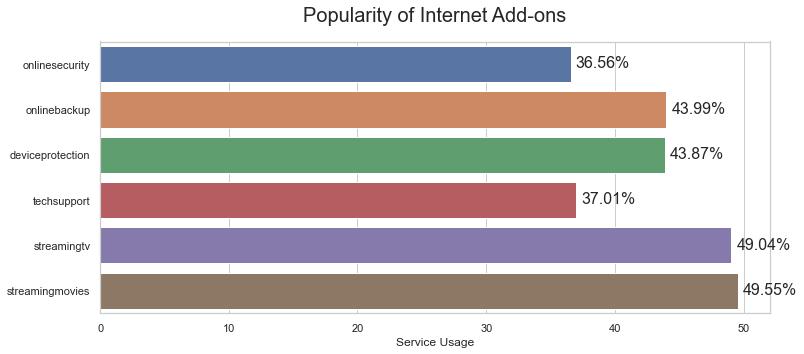

In [19]:
# Churn-Rate by Service Usage  
ax = sns.barplot(internet_service_popularity,internet_service_labels)
ax.set(xlabel='Service Usage')
for i, p in enumerate(ax.patches):
    ax.annotate((str(round(internet_service_popularity[i],2))+"%"),
                (p.get_x() + p.get_width(), p.get_y()+0.7),
                xytext=(5, 10), textcoords='offset points')
plt.title(("Popularity of Internet Add-ons"), fontsize = 20, pad =20)
plt.show()

In [20]:
# watch TV and movies
print('Customers with Streaming TV and Movies:',idf[(idf["streamingtv"] == "Yes")&(idf["streamingmovies"] == "Yes")].shape[0])

Customers with Streaming TV and Movies: 1939


In [21]:
# watch only TV 
print('Customers with Streaming TV only:',idf[(idf["streamingtv"] == "Yes")&(idf["streamingmovies"] == "No")].shape[0])

Customers with Streaming TV only: 764


In [22]:
# watch only movies
print('Customers with Streaming Movies only:',idf[(idf["streamingtv"] == "No")&(idf["streamingmovies"] == "Yes")].shape[0])

Customers with Streaming Movies only: 792


In [23]:
# percent of usage movies vs. TV
print('Percent customers who prefer Streaming Movies only:',round(idf[(idf["streamingtv"] == "No")&(idf["streamingmovies"] == "Yes")].shape[0]/idf[(idf["streamingtv"] == "Yes")].shape[0]*100,2))

Percent customers who prefer Streaming Movies only: 29.3


In [24]:
#check for mistakes
df[(df["internetservice"] == "No")&((df["streamingtv"] == "Yes")|(df["streamingmovies"] == "Yes")|(df["onlinesecurity"] == "Yes")|(df["onlinebackup"] == "Yes"))]

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn


In [25]:
df["streaming"] = np.where((df["streamingmovies"] == "Yes"),"Yes","No")
df.head(3)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,streaming
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No


In [26]:
df[df['churn'] == 'Yes'].streamingtv.value_counts(normalize=True)
df[df['churn'] == 'No'].streamingtv.value_counts(normalize=True)
df[df['churn'] == 'Yes'].streamingmovies.value_counts(normalize=True)
df[df['churn'] == 'No'].streamingmovies.value_counts(normalize=True)

Yes                    0.370521
No                     0.356963
No internet service    0.272516
Name: streamingmovies, dtype: float64

In [27]:
# percent of usage movies vs. TV
print('Percent customers who prefer Streaming Movies only:',round(df[(df["streamingtv"] == "No")&(df["streamingmovies"] == "Yes")].shape[0]/df[(df["streamingtv"] == "Yes")].shape[0]*100,2))

Percent customers who prefer Streaming Movies only: 29.3


## Multiple Lines popularity

In [28]:
print('Use Multiple Lines: ',df[(df["phoneservice"] == "Yes")&(df["multiplelines"] == "Yes")].shape[0],' == ',round(df[(df["phoneservice"] == "Yes")&(df["multiplelines"] == "Yes")].shape[0]/df[(df["phoneservice"] == "Yes")].shape[0]*100,2))
print('Use only one Line: ',df[(df["phoneservice"] == "Yes")&(df["multiplelines"] == "No")].shape[0],' == ',round(df[(df["phoneservice"] == "Yes")&(df["multiplelines"] == "No")].shape[0]/df[(df["phoneservice"] == "Yes")].shape[0]*100,2))

Use Multiple Lines:  2967  ==  46.71
Use only one Line:  3385  ==  53.29


The information included in the 'PhoneService' column is in the 'MultipleLines' column. I prefer to drop it too.

In [29]:
#df = df.drop(['phoneservice'], axis=1)

## Revenue source
Which services bring better result?<br>
I will look at the "TotalCharges" column, and break it down by customer. Becouse customers with different services have different levels of incentive to stay with the company, and how much they are willing to pay for the services.

In [30]:
revenue_services = []
revenue_services_labels = []

# Phone service only customers
revenue_services.append(df[(df["internetservice"] == "No") & (df["phoneservice"] == "Yes")]["totalcharges"].sum())
revenue_services_labels.append("Phone Only")

# Internet service only customers
revenue_services.append(df[(df["internetservice"] != "No") & (df["phoneservice"] == "No")]["totalcharges"].sum())
revenue_services_labels.append("Internet Only")

# Phone  and Internet customers
revenue_services.append(df[(df["internetservice"] != "No") & (df["phoneservice"] == "Yes")]["totalcharges"].sum())
revenue_services_labels.append("Phone and Internet")

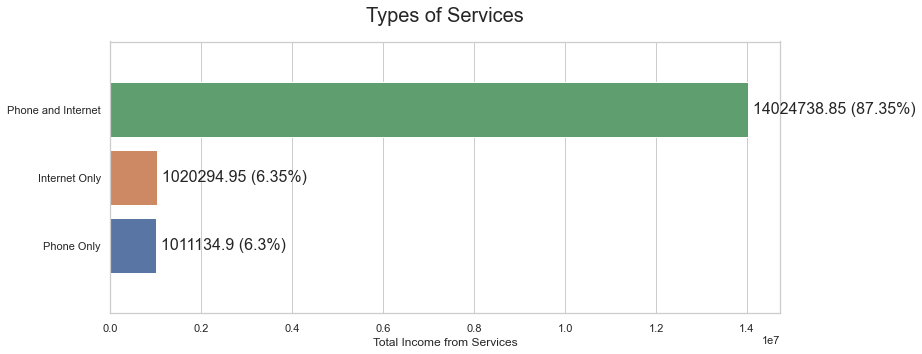

In [31]:
# Churn-Rate by Service Usage  
total=df["totalcharges"].sum()
ax = sns.barplot(revenue_services, revenue_services_labels)
ax.set(xlabel='Total Income from Services')
for i, p in enumerate(ax.patches):
    ax.annotate(str(round(revenue_services[i],2))+' ('+str(round(revenue_services[i]/total*100,2))+'%)',
                (p.get_x() + p.get_width(), p.get_y()+0.2),
                xytext=(5, 10), textcoords='offset points')
ax.set_ylim(-1,3)
plt.title(("Types of Services"), fontsize = 20, pad =20)
plt.show()

I divide the entire customer population into subgroups by service type: Phone Only, Internet Only, and Phone and Internet.<br>
**87.35 % of revenue comes from Phone and Internet customers.**<br> This group of customer also has the highest “churn” rate (32.8 %).

## Visualisation for categorical columns

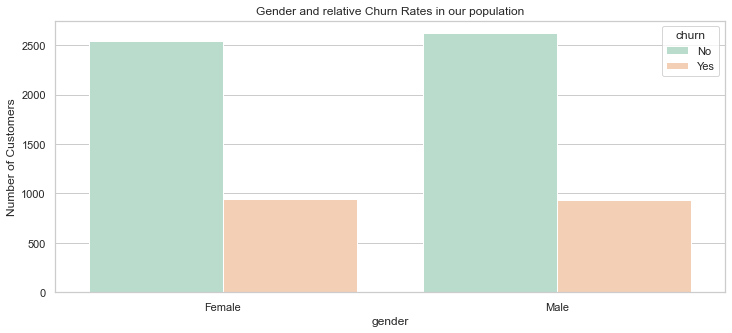

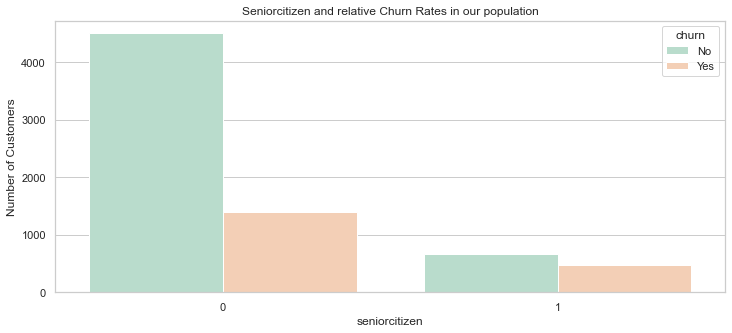

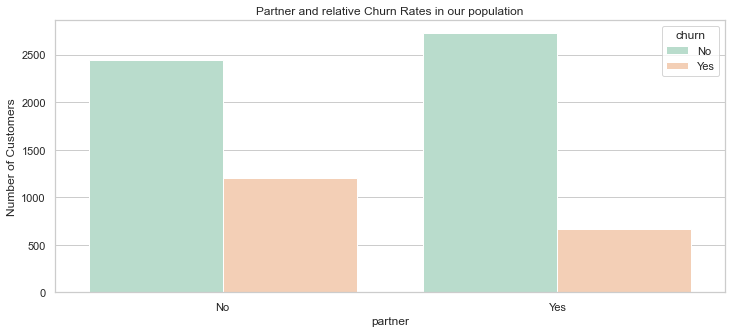

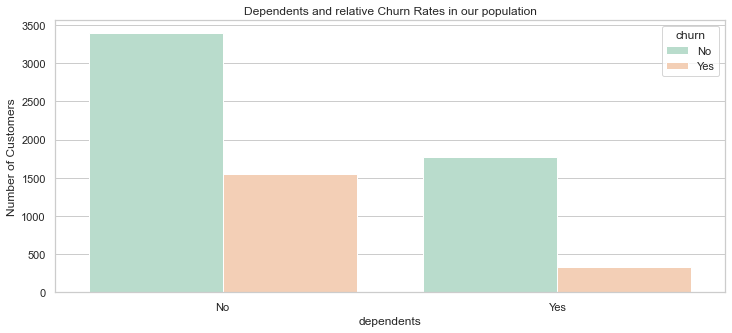

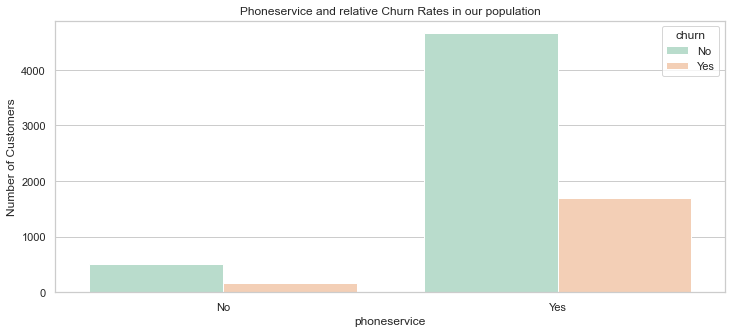

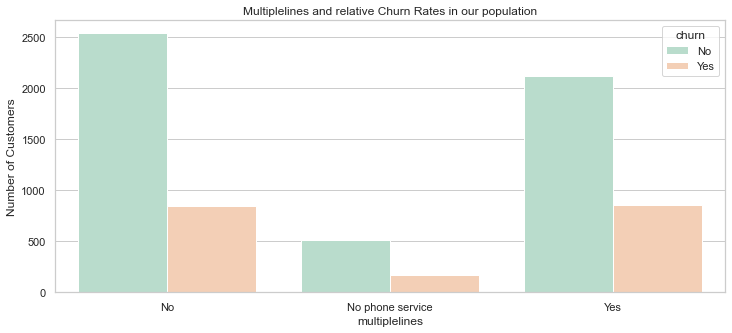

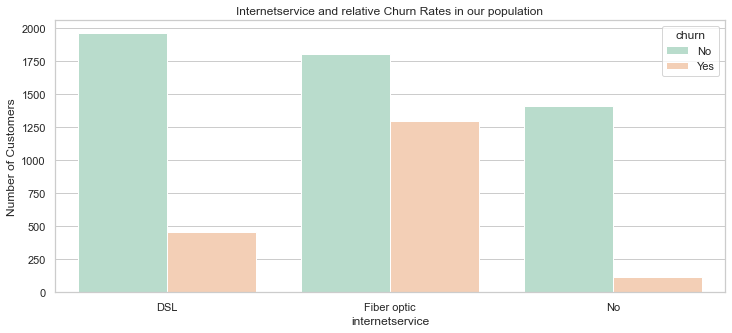

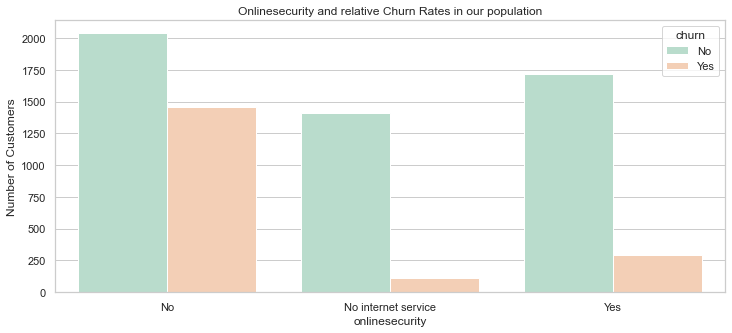

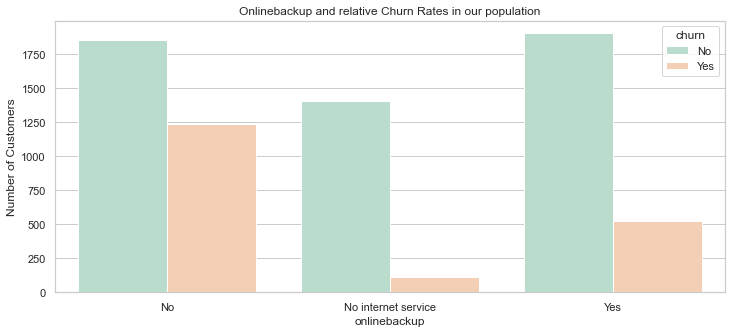

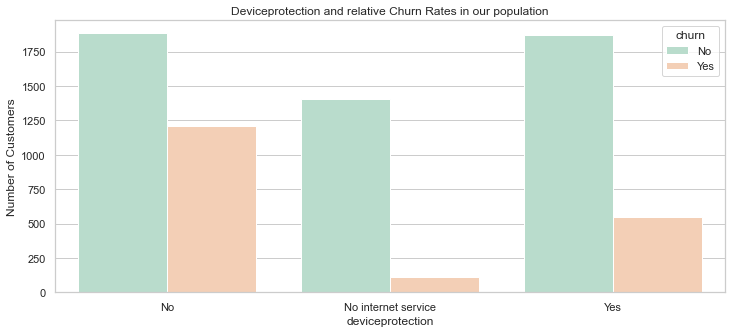

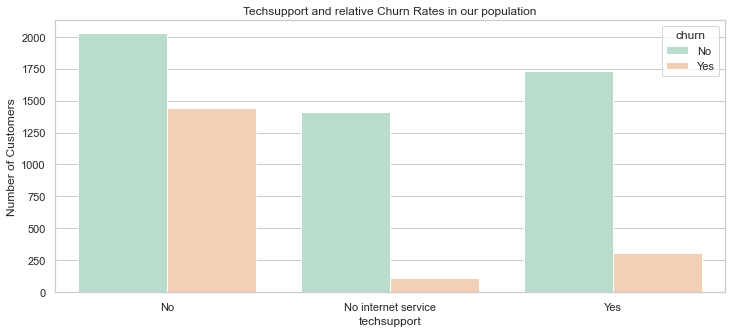

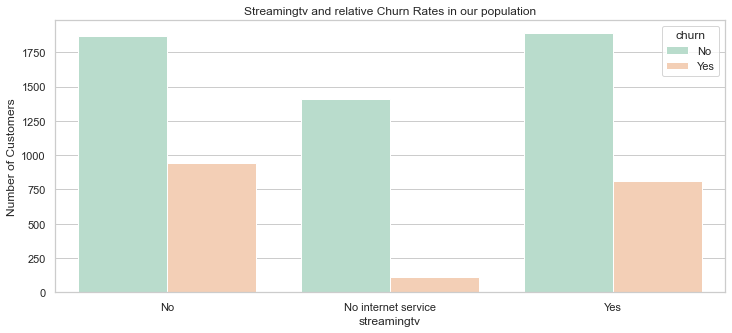

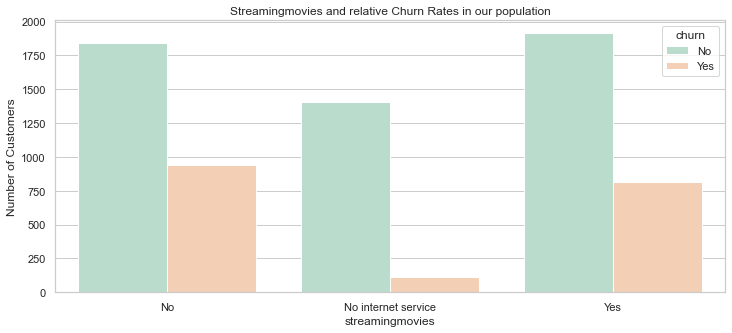

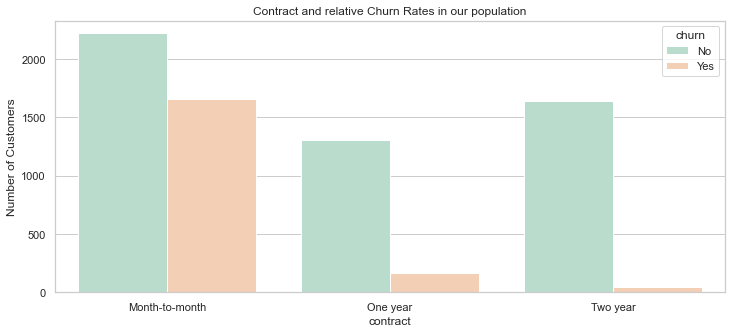

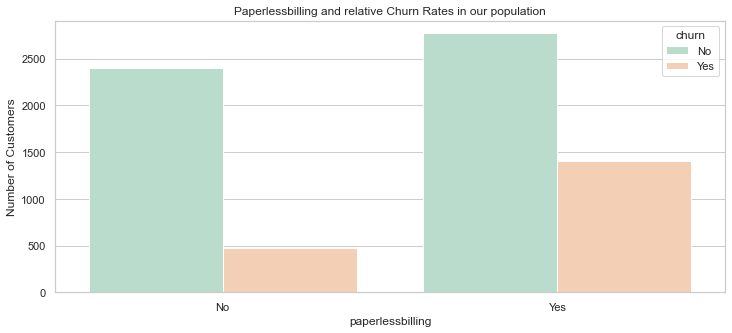

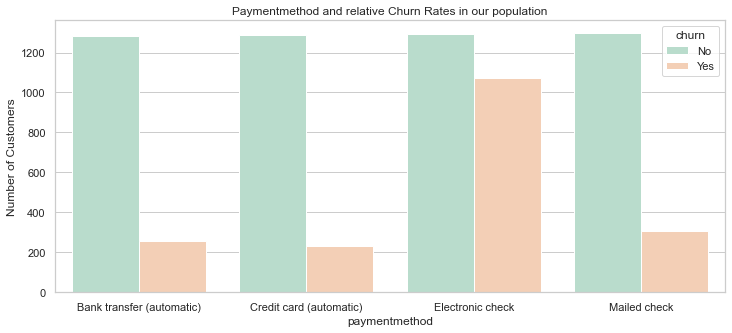

In [32]:
for i in cat_cols:
    print_cat(df,i)

### Using our graphs we can say:
* Gender: it seems to be an equal distribution of males and females with respect to churn intention (guess that gender is not important feature)
* Senior citizen: There are much fewer senior citizens and there is a larger proportion of senior citizens churning. In the churn plot shows more young people are churning. (can be important)
* Partner: People with partners and without partners have almost the same distribution of not churning, single people have more intention to churn. (can be important)
* Dependents: There are much fewer people with dependents, there is a larger proportion of people with no dependents churning (looks like an important feature)
* Phone Service: There are many more people with a phone service, almost the same intention of churn with people having phone service. (it should be important feature, but we need more explore it)
* Multiple Lines: The numbers of people who have and do not have multiple lines are almost the same with respect to churn intention.(not important, but should be explore with partner and dependent)
* Internet Service: There are many more people who have an internet service either with DSL or fiber, but there is a large proportion of people with fiber optic internet service who churn. (can expect that it is going to be an important prediction feature especially with Fiber Optic)
* Online Security: there are more people with no online security and a larger proportion of the people has online security, has not churned. (customers having online security tend to stay within company compared to customers without online security) 
* Online Backup: There are more people with no online backup and those who has online backup has less probability of churn (customers having OnlineBackup tend to stay within company compared to customers without OnlineBackup)
* Device Protection: There are more people with no device protection and those who have DeviceProtection has less probability to churn.(the same with previous)
* Tech Support: there are more people with no tech support and those who have tech support have less probability to churn.(the same with previous)
* Streaming TV: it seems to be almost an equal distribution of people who did and did not have streaming tv with respect to churn intention.
* Streaming Movies: there are more people with no streaming movies and those who have streaming movies have more probability to churn.
* Contract: There are many more people who are on a month-to-month contract and a large proportion of this group of people has churned. People with one year contracts are less churn. People with two years contracts are the least people may churn.(is one of the most important feature)
* Paperless Billing: The number of people with paperless billing has quite larger proportion in people who has churned
* PaymentMethod: There are more people adopting electronic check as a payment method and a large proportion of them have churned.
 
**Conclusion,** based on our analyses, we can see the more services added the less people churn. Gender is not a feature, phone service and multiple lines aren't service. 


-----
Lets now explore the churn rate by tenure, seniority, contract type, monthly charges and total charges to see how it varies by these variables.

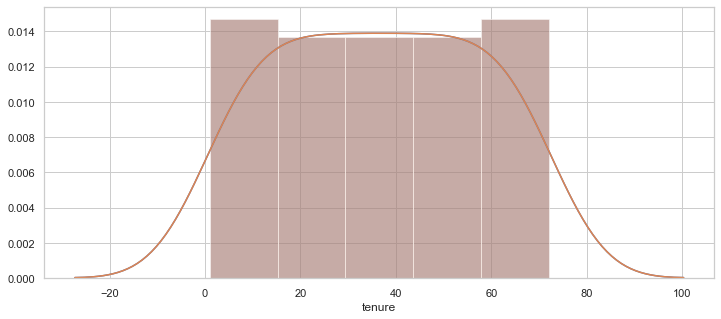

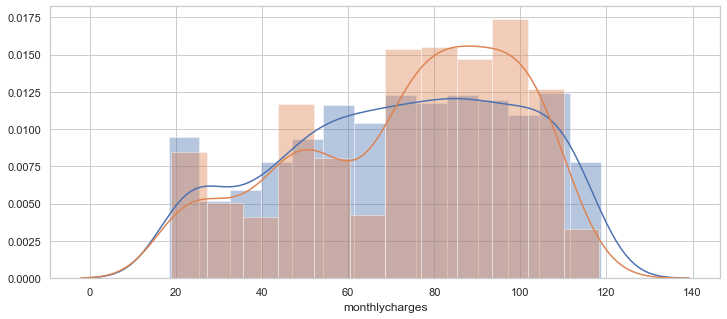

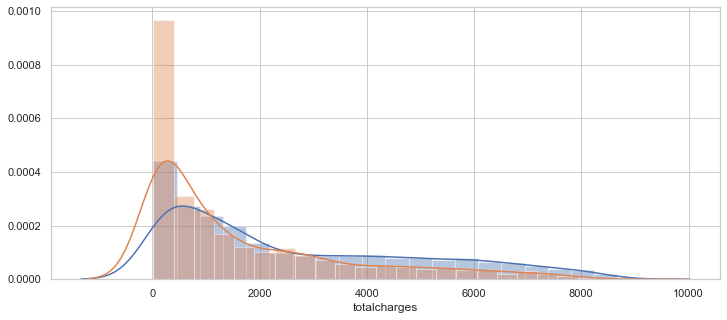

In [33]:
for col in numeric_cols: 
    gb = df.groupby(col)["churn"].value_counts().to_frame().rename({"churn": "Number of Customers"}, axis = 1).reset_index()
    gb1 = gb.loc[gb["churn"]=="No"]
    gb2 = gb.loc[gb["churn"]=="Yes"]
    sns.distplot(gb1[col])
    sns.distplot(gb2[col])
    plt.show() 

In [34]:
#
quant_col = df[['tenure', 'monthlycharges', 'totalcharges']]
# 
quant_col.describe()

,tenure,monthlycharges,totalcharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


<Figure size 1080x720 with 0 Axes>

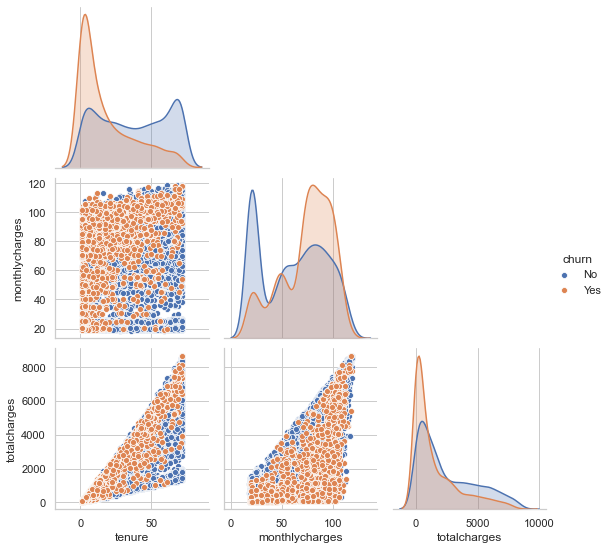

In [35]:
# for better wiew we compare this graphs by pairplot
plt.figure(figsize=(15, 10))
sns.pairplot(df, vars=['tenure', 'monthlycharges', 'totalcharges'], 
             hue='churn', diag_kind='kde',corner=True)
plt.show()

tenure            2
monthlycharges    1
totalcharges      2
dtype: int64


(<matplotlib.axes._subplots.AxesSubplot at 0x1187a9690>, None)

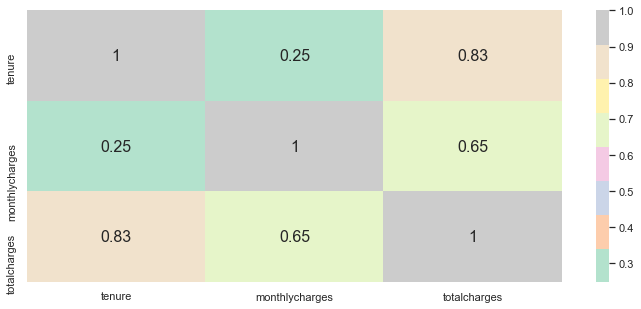

In [36]:
#make_heatmap(df, ['tenure', 'monthlycharges', 'totalcharges'])
sns.heatmap(df[['tenure', 'monthlycharges', 'totalcharges']].corr(),annot=True,cmap='Pastel2'),print(abs(df[['tenure', 'monthlycharges', 'totalcharges']].corr()>.75).sum())

Made heatmap of the numerical columns, it shows  multicollinearity. <br>
Total Charges and tenure columns has strong multicollinearity (over 0.80).<br>
Total Charges and Monthly Charges correlated too (65%).
*We should think about this correlation before modeling.*

<Figure size 1080x720 with 0 Axes>

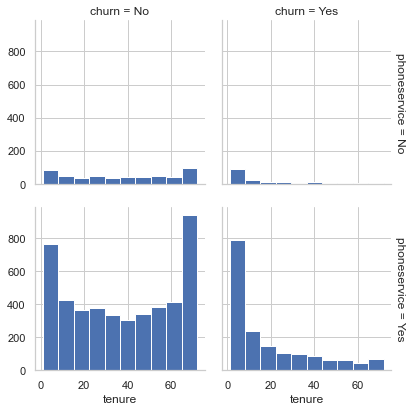

In [37]:
plt.figure(figsize=(15,10))
g = sns.FacetGrid(df, col='churn', row='phoneservice', margin_titles=True)
g.map(plt.hist, 'tenure')
plt.show()

In [38]:
# Can we create column Family where partner == YES and dependent == YES
df["huge_family"] = np.where(((df["partner"]=='Yes') & (df["dependents"]=='Yes')),1,0)
df[df["huge_family"]==1]

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,streaming,huge_family
10,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No,No,1
15,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No,Yes,1
18,Female,0,Yes,Yes,10,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,No,1
24,Male,0,Yes,Yes,49,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.60,2970.30,No,No,1
26,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7007,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes,No,1
7009,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239.00,No,No,1
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,Yes,1
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,Yes,1


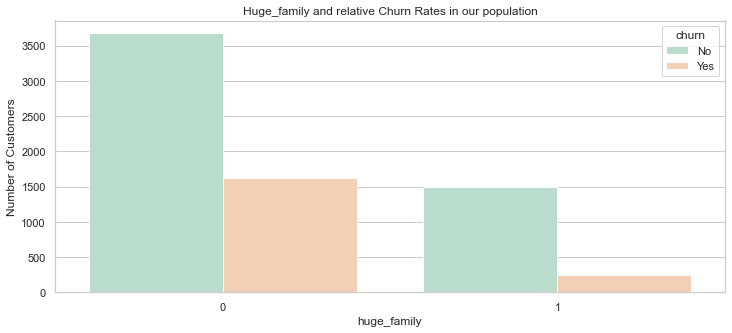

In [39]:
print_cat(df,'huge_family')

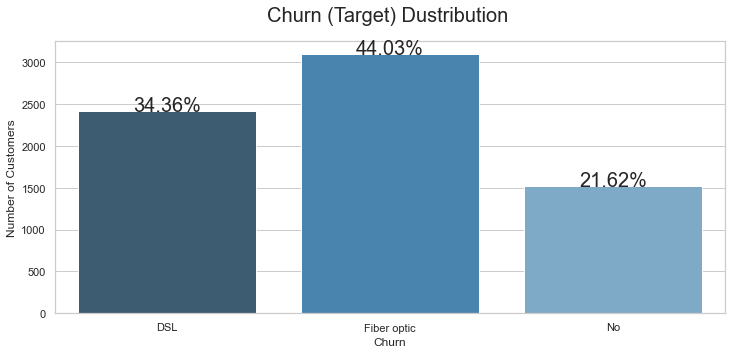

In [40]:
# one person per row
total = float(len(df))  
ax = sns.countplot(x='internetservice', data=df,  palette="Blues_d")
ax.set(xlabel='Churn',ylabel='Number of Customers')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3,
            '{:1.2f}'.format((height/total*100))+ '%',
            ha="center",fontsize=20) 
plt.title(("Churn (Target) Dustribution "), fontsize = 20, pad =20)
plt.show()

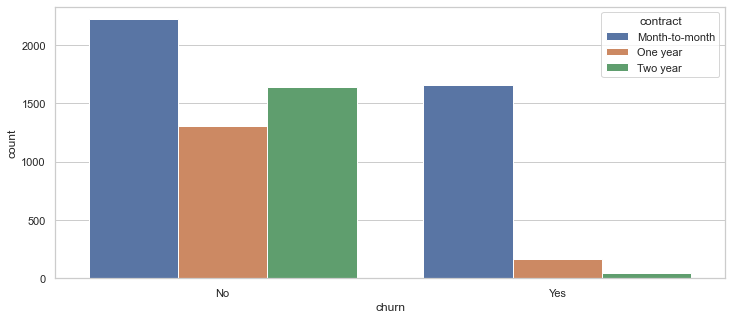

In [41]:
sns.countplot(x="churn", hue="contract", data=df)

In [42]:
df['tenure'] = df['tenure'].astype(int) 
df['churn'] = df['churn'].map( {'No': 0, 'Yes': 1} ).astype(int)


In [43]:
df.head(3)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,streaming,huge_family
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,No,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,No,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,No,0


Text(0.5, 1.0, 'Count of  Customers by their tenure')

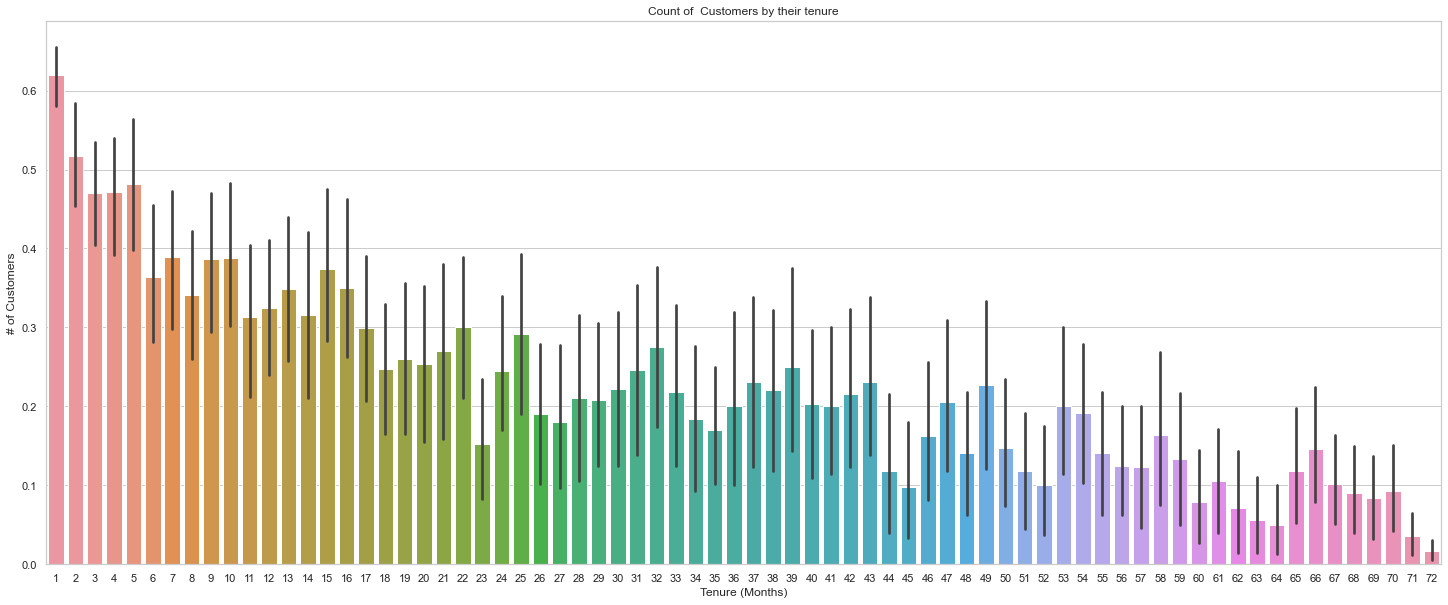

In [44]:
plt.figure(figsize=(25,10))

ax = sns.barplot(df.tenure, df.churn)
ax.set_ylabel("# of Customers")
ax.set_xlabel("Tenure (Months)")
ax.set_title("Count of  Customers by their tenure")

### Demographic columns: gender

In [45]:
df['gender'].value_counts(normalize=True)

Male      0.504693
Female    0.495307
Name: gender, dtype: float64

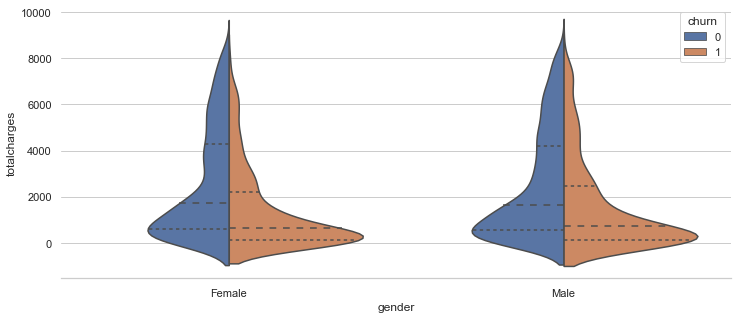

In [46]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="gender", y="totalcharges", hue="churn",
               split=True, inner="quart",
               #palette={"Yes": "Yes", "No": "No"},
               data=df)
sns.despine(left=True)

Gender column has almost equal values of churn and not churn. It doesn't give information about the possibility if a customer is likely to churn. I decide to drop this column.

In [47]:
df = df.drop(['gender'], axis=1)

In [48]:
n_by_state = df.groupby("tenure").count()
n_by_state.head(10)

,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,streaming,huge_family
tenure,,,,,,,,,,,,,,,,,,,,
1,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613
2,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238
3,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200
4,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176
5,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133
6,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110
7,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131
8,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123
9,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119


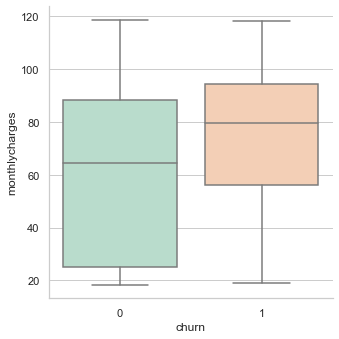

In [49]:
g = sns.catplot(x="churn", y = "monthlycharges",data = df, kind="box", palette = "Pastel2")

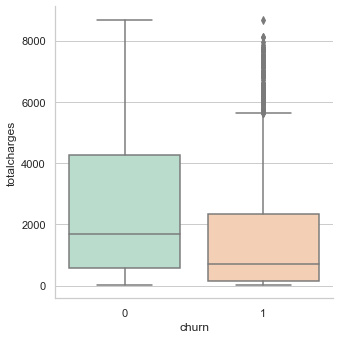

In [50]:
g = sns.catplot(y="totalcharges",x="churn",data=df,kind="box", palette = "Pastel2")

From boxen plot, most of churn customer has less than 2000 in total chrage.
In range of 2500 to 8000, population of loyalty customer is around twice as amount as churn customer.

Like in 'StreamingMovies' and 'StreamingTV' these two columns are almost the same. I am going to drop 'OnlineSecurity' column

In [51]:
df.onlinesecurity.value_counts(normalize=True)

No                     0.497298
Yes                    0.286547
No internet service    0.216155
Name: onlinesecurity, dtype: float64

In [52]:
df.techsupport.value_counts(normalize=True)

No                     0.493743
Yes                    0.290102
No internet service    0.216155
Name: techsupport, dtype: float64

In [53]:
df[df['churn'] == 'Yes'].onlinesecurity.value_counts(normalize=True)
df[df['churn'] == 'No'].onlinesecurity.value_counts(normalize=True)
df[df['churn'] == 'Yes'].techsupport.value_counts(normalize=True)
df[df['churn'] == 'No'].techsupport.value_counts(normalize=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Series([], Name: techsupport, dtype: float64)

In [54]:
df.columns

Index(['seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'monthlycharges', 'totalcharges', 'churn', 'streaming', 'huge_family'], dtype='object')

In [55]:
# actually doesn't give me any results like I expected
df.drop(['huge_family'], axis=1, inplace=True)
# replace for one column streming
df.drop(['streaming'], axis=1, inplace=True)
df.drop(['streamingmovies'], axis=1, inplace=True)
# after research we can drop
df = df.drop(['phoneservice'], axis=1)
# drop OnlineSecurity
df = df.drop(['onlinesecurity'], axis=1)

In [56]:
df.head()

,seniorcitizen,partner,dependents,tenure,multiplelines,internetservice,onlinebackup,deviceprotection,techsupport,streamingtv,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,0,Yes,No,1,No phone service,DSL,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,0,No,No,34,No,DSL,No,Yes,No,No,One year,No,Mailed check,56.95,1889.50,0
2,0,No,No,2,No,DSL,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,0,No,No,45,No phone service,DSL,No,Yes,Yes,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [57]:
df.to_csv("data/mod_churn.csv", index=False)

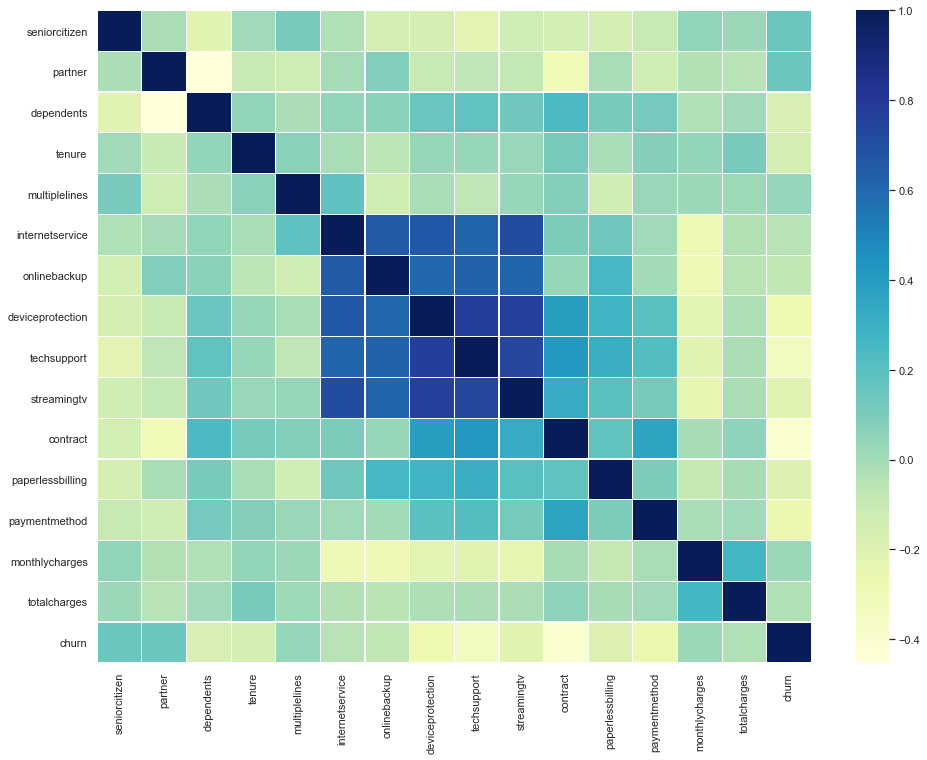

In [58]:
plt.figure(figsize=(16, 12))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
                 linewidths=.2, cmap="YlGnBu")

In [59]:
sum_info(df)

Number of rows: 7032, number of columns: 16


,Name,dtypes,Missing,Uniques,First Row,Last Row
0,seniorcitizen,int64,0,2,0,0
1,partner,object,0,2,Yes,No
2,dependents,object,0,2,No,No
3,tenure,int64,0,72,1,66
4,multiplelines,object,0,3,No phone service,No
5,internetservice,object,0,3,DSL,Fiber optic
6,onlinebackup,object,0,3,Yes,No
7,deviceprotection,object,0,3,No,Yes
8,techsupport,object,0,3,No,Yes
9,streamingtv,object,0,3,No,Yes
